<a href="https://colab.research.google.com/github/dev-tusha-soni/Covid--19-Data-Analysis-using-Power-Bi/blob/main/Power_bi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install pandas matplotlib seaborn plotly



In [ ]:
import pandas as pd

# Load COVID-19 dataset (example from Our World in Data)
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_data = pd.read_csv(url)

# Display dataset info
covid_data.info()

# Preview the dataset
covid_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
# Select key columns
columns = ['location', 'date', 'total_cases', 'total_deaths', 'total_vaccinations']
filtered_data = covid_data[columns]

# Filter for specific countries
countries = ['United States', 'India', 'Brazil', 'Italy', 'China']
filtered_data = filtered_data[filtered_data['location'].isin(countries)]

# Convert 'date' column to datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'])


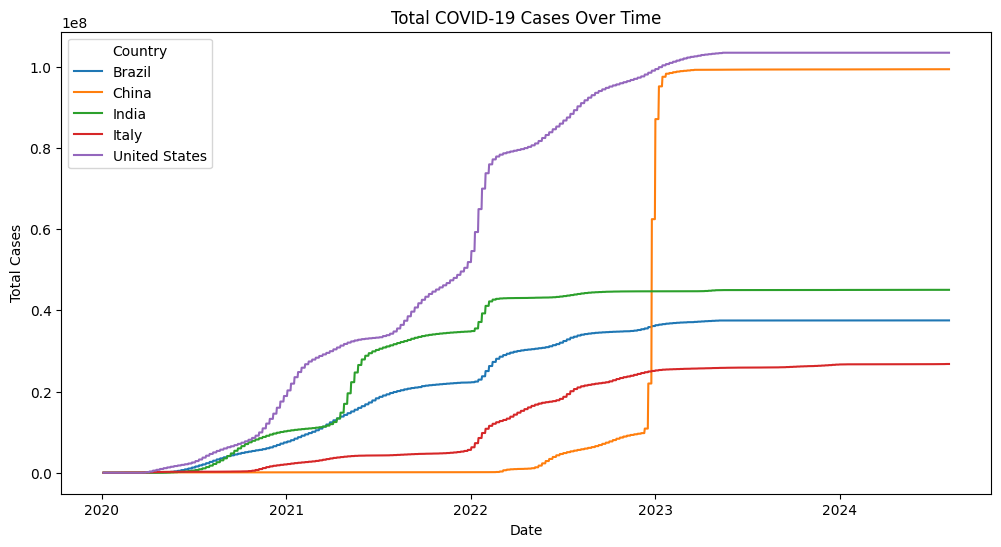

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.show()


<ipython-input-5-efbd1e559762>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_data, x='location', y='total_vaccinations', palette='viridis')


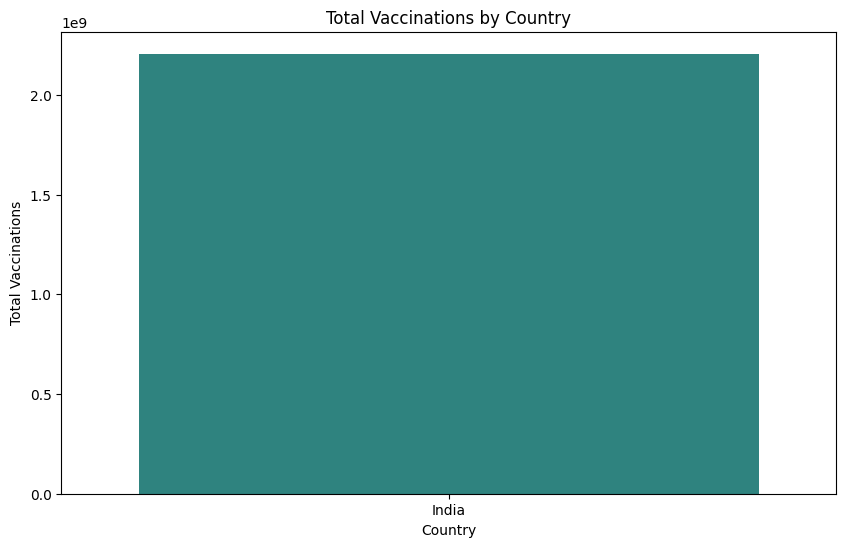

In [ ]:
# Latest vaccination data for selected countries
latest_data = filtered_data[filtered_data['date'] == filtered_data['date'].max()]

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=latest_data, x='location', y='total_vaccinations', palette='viridis')
plt.title('Total Vaccinations by Country')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.show()


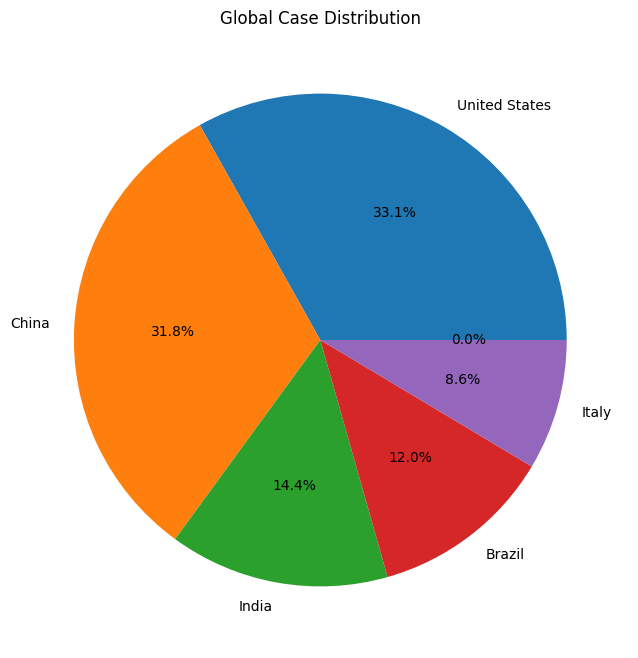

In [ ]:
# Total cases by country
global_cases = filtered_data.groupby('location')['total_cases'].max().dropna()

# Select top 5 countries and group others as "Other"
top_countries = global_cases.nlargest(5)
top_countries['Other'] = global_cases.sum() - top_countries.sum()

# Pie chart
top_countries.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Global Case Distribution')
plt.ylabel('')
plt.show()


In [ ]:
import plotly.express as px

# Latest data for all countries
map_data = covid_data[covid_data['date'] == covid_data['date'].max()]

# Create map
fig = px.choropleth(
    map_data,
    locations="location",
    locationmode="country names",
    color="total_cases",
    hover_name="location",
    title="Total COVID-19 Cases by Country",
    color_continuous_scale=px.colors.sequential.Plasma,
)
fig.show()


In [ ]:
# Save preprocessed data
filtered_data.to_csv('covid_data_filtered.csv', index=False)
